In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# Modelisation and experimental context

We want to draw the random statics of multi-colocalization from RNA of N different populations with different abundancies (a1,a2...aN).

Let's try to modelize the spatial distributions of RNAs as an urn drawing problem.

**Context**

Let us consider *V* differently **numbered balls** in the urn. In our experiement a cell has *V* pixels we can resolve to find our RNAs, in other words V different positions. Each time a ball is drawn (e.g a position) it is **replaced** in the urn for the next RNA.

For each RNA we draw *aN* positions. Let's try to sequentially draw each positions.

## First distribution, N = 1

For the first distribution the probability to co-localize with any other distribion will obviously be 0. But we can have a look at the probability of self-colocalization.

At any draw the probability of have a chosen position is 1 out V positions :  *1/V* since positions are replaced in the urn.

Let us call k the iterations of drawing, the number of draws to perform is *a1*.

* At k=1, first drawing :

    The probability of self-colocalization is 0

* At k=2, :

    The probability of picking the position drawn in k=1 is **1/V** (ie self colocalization probality).
Or in other word the probablity of picking a new position is **1-1/V**.

* At k=3 : 

    Things complexify as the probability now depends on the outcome of k=2.
To adress this let us consider the probablity the position we drew was never drawn.
So this specific postion has 1/V chance to be drawn at first draw and then again 1/V, we can view this a binomial trial without any sucess
so this probability is (1/V)².

* At k>2 :

     the probability that at draw k the picked position was never drawn is a binomial trial without any sucess : **(1/V)^k**.


In [3]:
V = 200
a1 = 100
experiment_number = 10000


In [4]:
random_generator = np.random.default_rng()
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws

array([[118,  71, 185, ...,  91, 162,  11],
       [137,  14,  40, ...,  63, 148,  43],
       [175,  37,   3, ..., 159, 181, 107],
       ...,
       [189,  93,  98, ...,  49, 176,  20],
       [ 12,  52, 184, ...,  69, 182,  77],
       [192,   3, 126, ..., 152,  10, 122]])

In [5]:
colocalisation_count = []
for experiment in draws :
    colocalisation_count.append(len(experiment) - len(np.unique(experiment)))

expected_number_colocalisation :  21.154087298145583


(0.0, 100.0, 0.0, 0.128415)

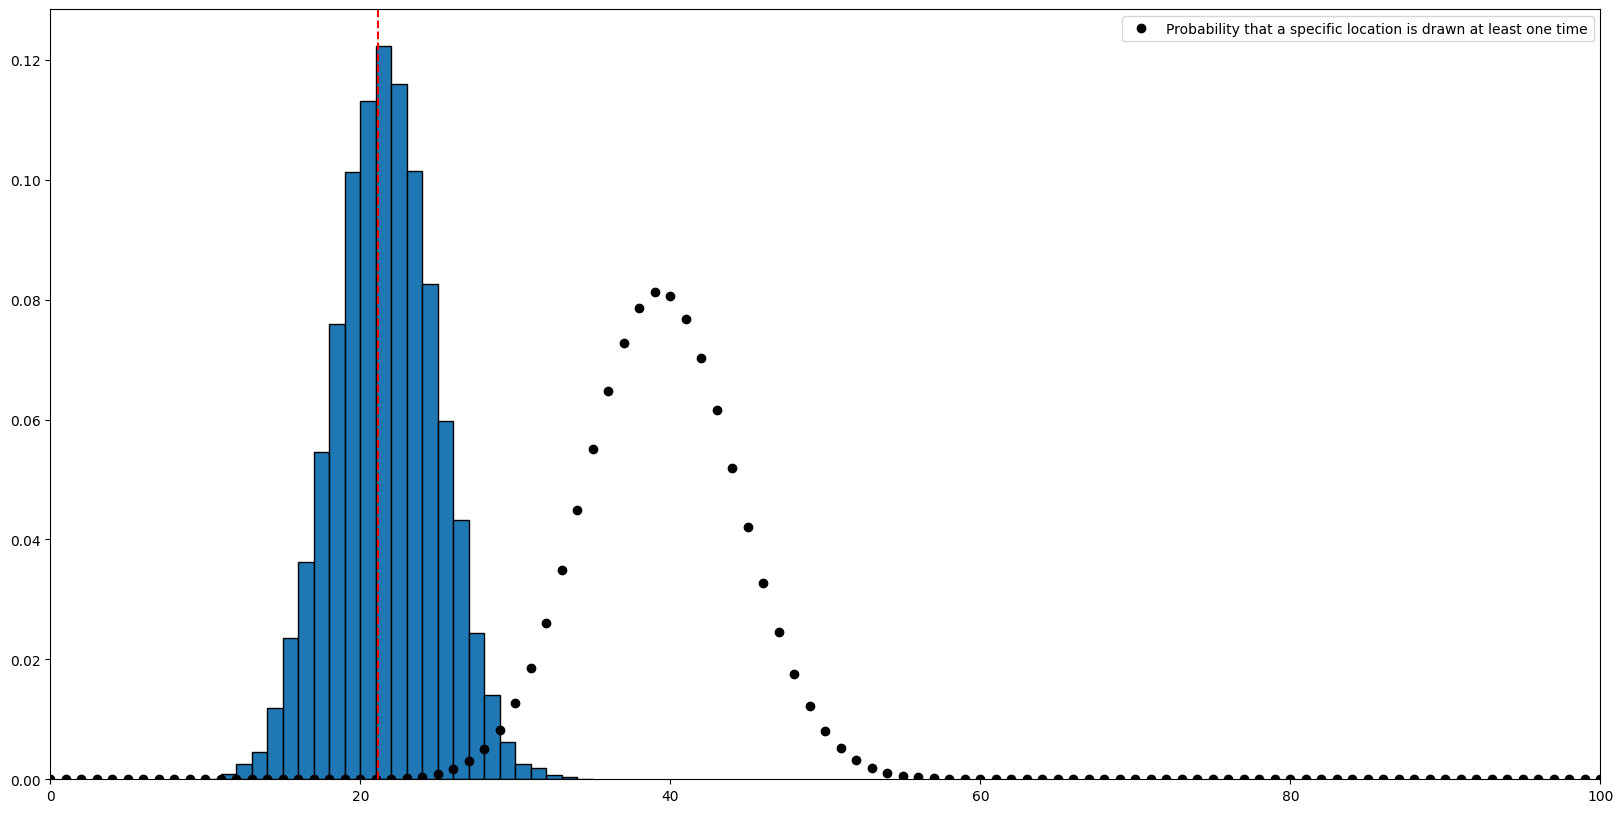

In [6]:
p = 1-(1-1/V)**a1 #

x = np.arange(a1 +1 )
pmf = binom.pmf(x,a1, p)

expceted_number_colocalisation = a1- V*p

print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True)

ax.set_xlim(0,a1)
ax.plot(x, pmf, 'ok', label= "Probability that a specific location is drawn at least one time")
xmin,xmax,ymin,ymax = plt.axis()
ax.plot([expceted_number_colocalisation,expceted_number_colocalisation],[ymin,ymax], '--r')
ax.legend()

plt.axis([xmin,xmax,ymin,ymax])





## Two distribution, N= 2

In [84]:
V = 200
a1 = 100
a2 = 150
experiment_number = 1000000

Expected_number_different_a1_positions = V*(1-(1-(1/V))**a1)
Expected_number_different_a1_positions

78.84591270185442

In [103]:
random_generator = np.random.default_rng()
a_1_draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a2))
draws

array([[155,  92,  73, ...,  37,  32,  60],
       [112, 139, 176, ..., 116,  88, 197],
       [120, 166,  59, ..., 165,  42,  18],
       ...,
       [ 11, 103,  99, ..., 165,  13,  78],
       [ 45, 120,  87, ..., 103,  91,   4],
       [173, 188,  82, ..., 114,  95, 102]])

In [110]:
colocalisation_count = []
different_pairs = []
for experiment, a_1_sample in zip(draws, a_1_draws) :
    
    colocalisation_count.append(len(
        experiment[np.isin(experiment, a_1_sample)]
    ))

    # different_pairs.append(len(
    #     np.unique(experiment[np.isin(experiment, a_1_sample)])
    # ))

In [ ]:
truth_table  = (draws[:,:,None] == a_1_draws[:,None,:]).any(axis=2)
colocalisation_count_test = truth_table.sum(axis=1)


In [ ]:
all(colocalisation_count_test == colocalisation_count)

True

In [87]:
def compute_colocalization_count_expectancy(a1_unique, a2, V) :
    """
    Compute the expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Expectancy = np
    
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    coloc_count = a2 * a1_unique/V
    
    return coloc_count

In [88]:
def compute_colocalization_count_std(a1_unique, a2, V) :
    """
    Compute standard deviation of expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Std = np(1-p)
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    std = a2 * a1_unique/V * (1-a1_unique/V)
    
    return std

In [89]:
def compute_unique_pair_expectancy(a1_unique, a2, V) :
    """
    Compute expected number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    """
    if V == 0 : return np.NaN
    
    unique_pair_count = a1_unique*(1-(1-1/V)**a2)
    
    return unique_pair_count

In [90]:
from math import comb

def compute_unique_pair_std(a1_unique, a2, V) :
    """
    Compute expected standard deviation of number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    
    We use the formula of variance for a sum of random variables Ii.
    var = iSum(Var(I)) + 2*iSum(Cov(I))
    
    First term is called Exp
    second Cov
    
    Exp = Sum(p*(1-p)) (Bernoulli law)
     --> a1_unique *(p(1-p))
    
    Cov = E(Ii and Ij) - E(Ii)*E(Ij) (called Eij, Ei and Ej)
    
    """
    if V == 0 : return np.NaN
    
    p = 1 - (1-1/V)**a2 # probability to draw a specific location at least once
    Exp = a1_unique*p*(1-p) # Variance of bernouli law
    Cov = (1-2/V)**a2 - (1-1/V)**(2*a2) #Simplified expression for cov
    
    var = Exp + 2*comb(round(a1_unique),2)*Cov
    
    return np.sqrt(var)

expected_number_colocalisation :  21.154087298145583
expected_number_of_unique_pairs :  41.67174133032364


(0.0, 150.0, 0.0, 0.10952771339962995)

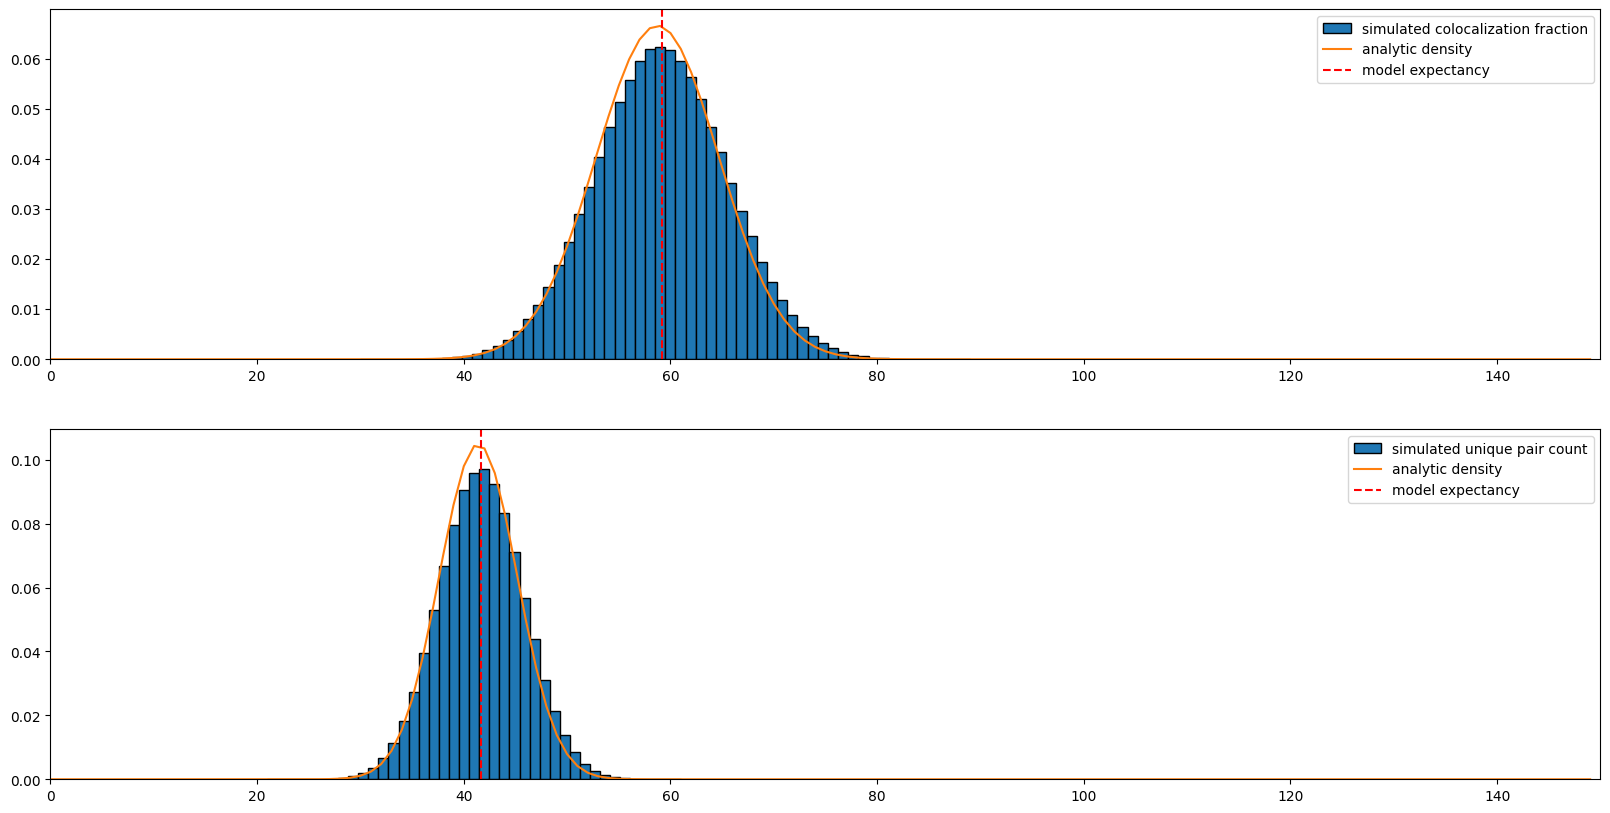

In [91]:
# p = 1-(1-1/V)**a1 #

# x = np.arange(a1 +1 )
# pmf = binom.pmf(x,a1, p)


print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
top,bot = fig.subplots(2,1)

#Co-localisation fraction
expected_colocalization_fraction = (a2*Expected_number_different_a1_positions)/V
std = np.sqrt(expected_colocalization_fraction* (1-Expected_number_different_a1_positions/V))

count,bins,_ =top.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True, label='simulated colocalization fraction')

top.plot(norm.pdf(np.linspace(0,a2,a2), expected_colocalization_fraction, std), label= 'analytic density')

xmin,xmax,ymin,ymax = top.axis()
top.plot([expected_colocalization_fraction,expected_colocalization_fraction],[ymin,ymax], '--r', label= 'model expectancy')
top.legend()
top.axis([0,a2,ymin,ymax])


#Cluster number forming pairs
expected_number_of_unique_pairs = Expected_number_different_a1_positions*(1-(1-1/V)**a2)
std = compute_unique_pair_std(Expected_number_different_a1_positions, a2, V)
print("expected_number_of_unique_pairs : ",expected_number_of_unique_pairs)

bot.hist(different_pairs, edgecolor='black', bins=len(np.unique(different_pairs)), align='mid', density=True, label='simulated unique pair count')
bot.plot(norm.pdf(np.linspace(0,a2,a2), expected_number_of_unique_pairs, std), label= 'analytic density')
xmin,xmax,ymin,ymax = bot.axis()
bot.plot([expected_number_of_unique_pairs,expected_number_of_unique_pairs],[ymin,ymax], '--r', label= 'model expectancy')
bot.legend()
bot.axis([0,a2,ymin,ymax])


***Notes***

* **Expand to higher dimension**    
    It might be possible to extend this model to higher N dimensions, however to process our data with high N (10<=N<=30). We choose to test    statistically our each pair of RNAs (2 amongst 30). And then to use again the N=2 to test pairs that passed the test with each RNA.

* **Perfection co-localization assumption**  
    This models consider perfectly co-localizing molecules, in other words, identical coordinates for detection. In practice due to interaction distance, microscope resolution and variability in drift/aberration correction a co-localization distance can be introduced. This can be taken into account by reducing the available number of positions with  **reduced_volume** = ***number of pixel in colocalization distance radius***/***V***.


    However this will introduce **edge effects**, where the volume of pixel scanned by colocalization radius will not be the number of pixel in co-localization radius. One can argue that this effect will be negligible depending on colocalization_radius / cell_radius. Also this biais might be lower that the one given by the assumption that single molecules positions follows an uniform probability density in space in the absence of interaction.

* **Functionnal implementation**  
    A functionnal implementation of this code is available in analysis/models.py

# How does this model performs confronted to prior simulation ?

I previously ran a simulation based on the number of pixel per slice and using a co-localization distance > 1 px. Let see how this model compare when correcting and when not correcting for co-localization distance.

## Simulation results

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_squared_shape(area, dim=2) :
    c = np.float_power(area, 1/dim)
    
    c = int(np.round(c))
    return (c,)*dim

dim = 2
area =25000
get_squared_shape(area, dim=dim)

(158, 158)

In [3]:
def create_planes_with_random_distribution(
    spot_number : int, 
    area : int, 
    colocalization_distance : int, 
    voxel_size : tuple,  
    random_generator : np.random.Generator = None,
    ) :
    
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    n_layers = 2*z_range + 1
    shape = get_squared_shape(area)
    
    if random_generator is None :
        random_generator = np.random.default_rng()
    
    random_spots = random_generator.integers(
        low=[0,0],
        high=shape,
        size=(spot_number * n_layers, 2)
    )
    
    
    z_coords = np.arange(n_layers * spot_number)
    z_coords = z_coords.reshape(n_layers*spot_number,1) % n_layers
    
    random_spots_array =  np.concatenate([z_coords, random_spots], axis=1)
    random_spots_array *= voxel_size
    
    return random_spots_array

In [4]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

def create_NearestNeighbors_models(spots : np.ndarray, colocalization_distance : int,) :
   return NearestNeighbors(n_neighbors=1, radius=colocalization_distance).fit(spots)

In [5]:
def compute_colocalization_rate(test_number : int, area : int, model : NearestNeighbors, colocalization_distance, voxel_size) :
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    shape = get_squared_shape(area)
    
    z = np.floor(z_range/2) #midle stack
    
    random_generator = np.random.default_rng()
    spots = random_generator.integers(
        low=[z,0,0],
        high=(z+1,) + shape,
        size=(test_number,3)
    )
    
    spots *=voxel_size
    
    distances, indices = model.kneighbors(spots)
    
    success_rate = (distances <= colocalization_distance).sum()
    success_rate /= test_number
    
    return success_rate
    

In [6]:
def run_random_coloc_simulation(
    area : int,
    spot_number_per_plane : int,
    n_test : int,
    voxel_size : tuple,
    colocalization_distance : int
) :
    
    random_spots_array = create_planes_with_random_distribution(
        spot_number=spot_number_per_plane,
        area=area,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size,
    )
    model = create_NearestNeighbors_models(random_spots_array, colocalization_distance=400)
    
    colocalization_rate = compute_colocalization_rate(
        test_number=n_test,
        area=area,
        model=model,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size
    )
    
    res = (
        area,
        spot_number_per_plane,
        colocalization_rate
    )
    
    return res

### colocalization_distance = 1 px

In [7]:
n_test = 100000
voxel_size = (200,97,97)
colocalization_distance = 96

min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:11<00:00,  8.46it/s]


In [8]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.00015
1,10000.0,3,0.00038
2,10000.0,4,0.00040
3,10000.0,5,0.00045
4,10000.0,6,0.00058
...,...,...,...
795,140000.0,5,0.00004
796,140000.0,6,0.00006
797,140000.0,7,0.00007
798,140000.0,8,0.00013


#### Visualisation

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

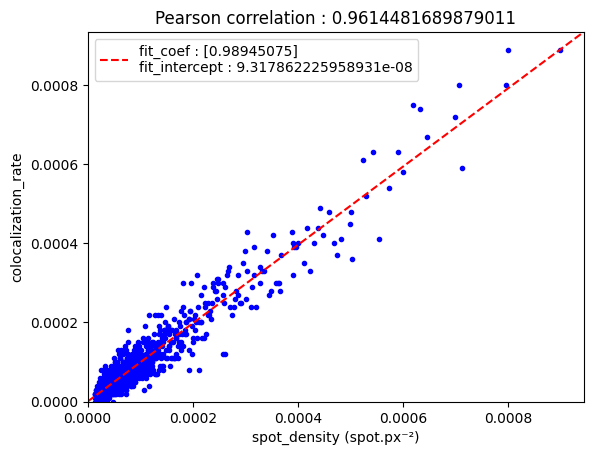

In [10]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()


### Colocalization distance = 2 px z or 4 px xy

In [11]:
n_test = 100000
voxel_size = (200,97,97)
colocalization_distance = 400

min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


In [12]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.02730
1,10000.0,3,0.03604
2,10000.0,4,0.04722
3,10000.0,5,0.06456
4,10000.0,6,0.07192
...,...,...,...
795,140000.0,5,0.00488
796,140000.0,6,0.00547
797,140000.0,7,0.00678
798,140000.0,8,0.00760


In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

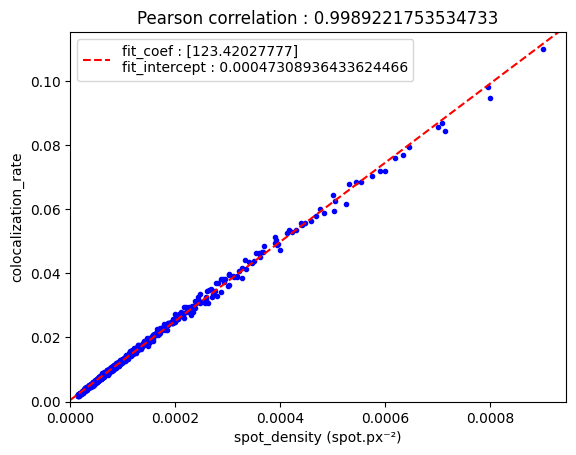

In [14]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()


## Using model without correction

Let's try to use our model out of the box without other correction.
We want to plot the predicted co-localization rate vs the spot_density condition we gave it.


In [17]:
from Sequential_Fish.analysis.models import compute_colocalization_count_expectancy
from Sequential_Fish.analysis.models import compute_colocalization_count_std
from Sequential_Fish.analysis.models import compute_unique_position_expectancy


In our simulation spot density goes from ***2/max_area*** to ***10/min_area*** 

In [18]:
density_bounds = (2/max_area, 10/min_area) #spot.px⁻¹
density_bounds

(1.4285714285714285e-05, 0.001)

In [19]:
fixed_volume = 50000 #px; Volume is fixed and spots abudancy is changed to match spots density
spots_abundancy = [fixed_volume* density for density in density_bounds]
spots_abundancy

[0.7142857142857143, 50.0]

In [113]:
points_number = 100
data = []

a2 = 100
spots_density = np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) / fixed_volume

for a1 in np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) :
    expected_unique_positions = compute_unique_position_expectancy(a1, V=fixed_volume)
    expected_coloc_rate = compute_colocalization_count_expectancy(
        a1_unique=expected_unique_positions,
        a2=a2,
        V=fixed_volume
    ) /a2
    
    data.append(expected_coloc_rate)

### Visualisation

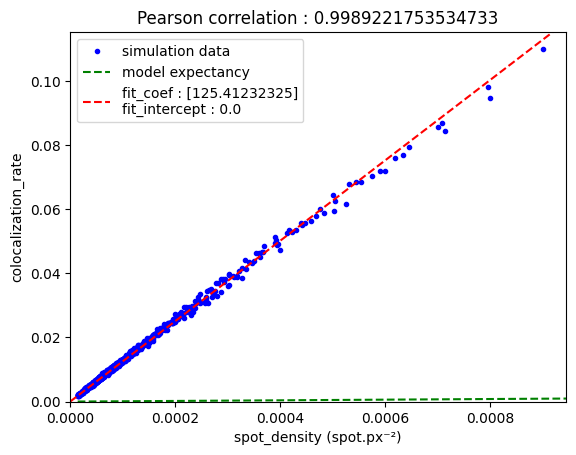

In [114]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression(fit_intercept=False).fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b', label= 'simulation data')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

model_plot = ax.plot(spots_density,data, '--g', label = 'model expectancy')

xmin,xmax,ymin,ymax = plt.axis()

fit_plot = ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
legend = ax.legend()

Simulation is much closer to our real data and we can see model cannot be used as such without correction for co-localization distance

## Using model with correction for co-localization radius

Now let's try to correct volume with co-localization_distance


### Correcting volume

In [62]:
from scipy.ndimage import distance_transform_edt

In [101]:
voxel_size = (200,97,97)
coloc_distance = 400

In [102]:
shape = np.array([s +1 if s%2 == 0 else s for s in voxel_size], dtype=int) # Creating over sized array to scan within how many pixel are closer than radius

print(shape) # shape of coloc radius
print(tuple(np.floor(shape/2).astype(int))) # middle index

map = np.ones(shape=shape)
map[tuple(np.floor(shape/2).astype(int))] = 0
map = distance_transform_edt(map, sampling=voxel_size)

scanned_pixel = (map <= coloc_distance).sum()
scanned_pixel

[201  97  97]
(100, 48, 48)


133

In [103]:
corrected_volume = fixed_volume/scanned_pixel

### call model

In [122]:
points_number = 100
data = []

a2 = 100
spots_density = np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) / fixed_volume # here volume is fixed volume not corrected volume

for a1 in np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) :
    expected_unique_positions = compute_unique_position_expectancy(a1, V=corrected_volume)
    expected_coloc_rate = compute_colocalization_count_expectancy(
        a1_unique=expected_unique_positions,
        a2=a2,
        V=corrected_volume
    ) /a2
    
    data.append(expected_coloc_rate)

### Visualisation

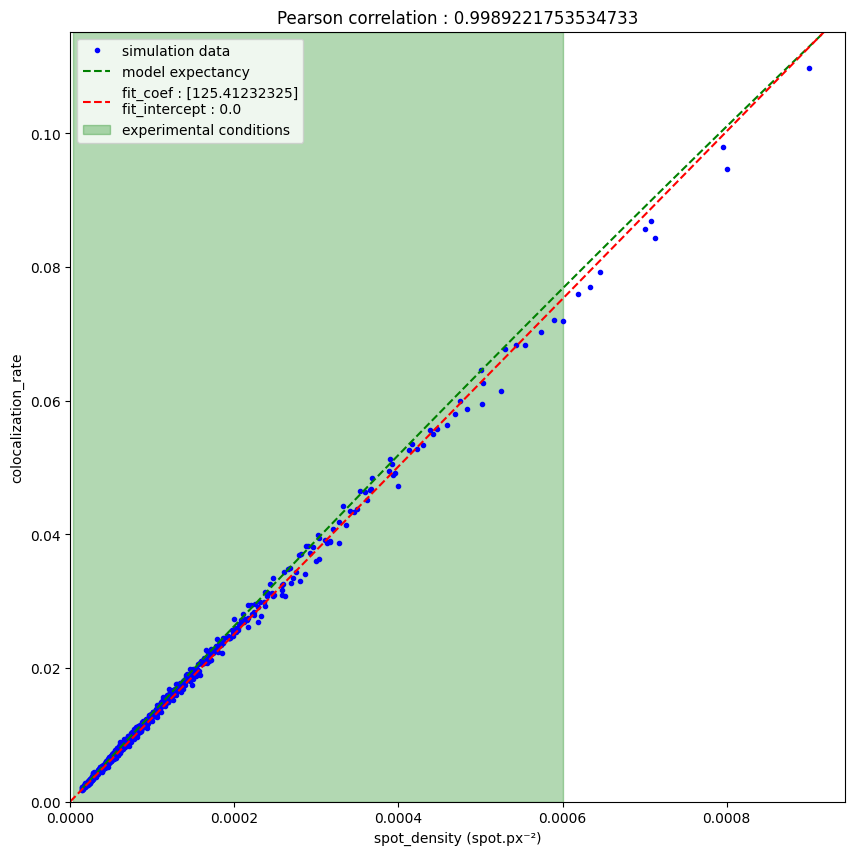

In [127]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression(fit_intercept=False).fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure(figsize = (10,10))
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b', label= 'simulation data')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

model_plot = ax.plot(spots_density,data, '--g', label = 'model expectancy')


fit_plot = ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")


xmin,xmax,ymin,ymax = plt.axis()

#Show experimental region
exp_min_area = 10000 #px per plane
exp_max_area = 150000 #px per plane
exp_spot_per_plane_min = 0.5
exp_spot_per_plane_max = 6
min_bound = exp_spot_per_plane_min/exp_max_area
max_bound = exp_spot_per_plane_max/exp_min_area

plt.axvspan(
    min_bound,
    max_bound,
    color='green',
    alpha=0.3,
    label= 'experimental conditions'
)

legend = ax.legend()


Model expectancy and simulation match really closely. This suggests that volume correction works and that edge effects are negligible.